# Tutorial 4: Phase planes

Here we'll learn how to build the two-dimensional version of a phase line, called a **phase plane**. This is a useful way to visualize two-dimensional models.

## Example

Take our 2-island bird example,

$$
\frac{\mathrm{d}\vec{n}}{\mathrm{d}t} = \mathbf{M}\vec{n} + \vec{m},
$$

where 

$$
\begin{aligned}
\vec{n} &= \begin{pmatrix} n_1 \\ n_2 \end{pmatrix}\\
\mathbf{M} &= \begin{pmatrix} b_1 - d_1 - m_{12} & m_{21} \\ m_{12} & b_2 - d_2 - m_{21} \end{pmatrix}\\
\vec{m} &= \begin{pmatrix} m_1 \\ m_2 \end{pmatrix},
\end{aligned}
$$

with $n_i$ the number of birds on island $i$ at time $t$, $b_i$ the birth rate on island $i$, , $d_i$ the death rate on island $i$, $m_{ij}$ the rate at which birds on island $j$ migrate to island $i$, and $m_i$ the rate at which birds arrive to island $i$ from elsewhere.

To visualize the dynamics we will build a phase plane. We start by finding the **nullclines**, which are the values of the variables that make the change in each variable zero. In this case there are two nullclines, which we can solve for in terms of $n_2$,

$$
\begin{align}
\frac{\mathrm{d}n_1}{\mathrm{d}t} &= 0\\
(b_1 - d_1 - m_{12})n_1 + m_{21} n_2 + m_1 &= 0\\
m_{21} n_2 &= -m_1 - (b_1 - d_1 - m_{12})n_1\\
n_2 &= \frac{-m_1 - (b_1 - d_1 - m_{12})n_1}{m_{21}}
\end{align}
$$

and

$$
\begin{align}
\frac{\mathrm{d}n_2}{\mathrm{d}t} &= 0\\
(b_2 - d_2 - m_{21})n_2 + m_{12} n_1 + m_2 &= 0\\
(b_2 - d_2 - m_{21})n_2  &= -m_{12} n_1 - m_2\\
n_2  &= \frac{-m_{12} n_1 - m_2}{b_2 - d_2 - m_{21}}.
\end{align}
$$

These two nullclines are lines along which $n_1$ or $n_2$ does not change. Let's plot them for some parameter values.

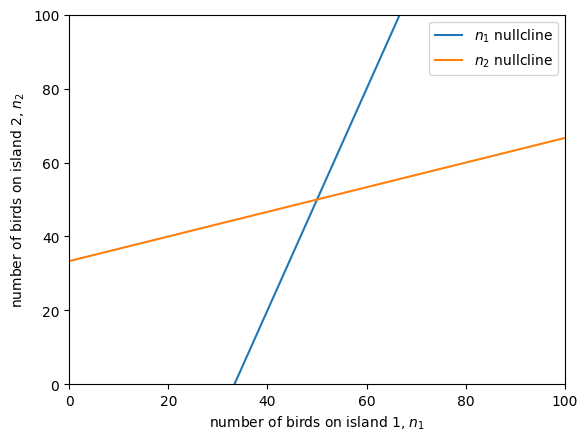

In [3]:
import matplotlib.pyplot as plt
from sympy import *
import numpy as np

# define the variables
n1, n2 = symbols('n1, n2')

# Choose the parameter values
b1, b2 = 1, 1
d1, d2 = 1.1, 1.1
m12, m21 = 0.05, 0.05
m1, m2 = 5, 5

# define differential equations
dn1dt = (b1 - d1 - m12) * n1 + m21 * n2 + m1
dn2dt = m12 * n1 + (b2 - d2 - m21) * n2 + m2

# get the nullclines
nullcline_1 = solve(Eq(dn1dt, 0),n2)[0]
nullcline_2 = solve(Eq(dn2dt, 0),n2)[0]

# plot
n1s = np.linspace(0,100,100)
plt.plot(n1s, [nullcline_1.subs(n1,i) for i in n1s], label='$n_1$ nullcline')
plt.plot(n1s, [nullcline_2.subs(n1,i) for i in n1s], label='$n_2$ nullcline')

plt.xlabel('number of birds on island 1, $n_1$')
plt.ylabel('number of birds on island 2, $n_2$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend()
plt.show()

Along the blue line $n_1$ does not change (so we must move exactly up or down) and along the orange line $n_2$ does not change (so we must move exactly left or right). Where the two lines intersect neither $n_1$ or $n_2$ changes, meaning we have an **equilibrium**. What we would next like to know is how we move when not on either of the lines.

Notice that the nullclines divide the plane into sections (4 in the plot above). Because the change in $n_1$ and $n_2$ is only zero on their respective nullclines, if $n_i$ increases (or decreases) somewhere in a section than it increases (or decreases) everywhere in that section. That means we can choose a convenient place within a section, like $n_1=n_2=0$. Here the differential equations are

$$
\begin{align}
\left.\frac{\mathrm{d}n_1}{\mathrm{d}t}\right|_{n_1=n_2=0} &= m_1\\
\left.\frac{\mathrm{d}n_2}{\mathrm{d}t}\right|_{n_1=n_2=0} &= m_2.
\end{align}
$$

In our example both $m_i$ are positive, meaning that both $n_1$ and $n_2$ are increasing at $n_1=n_2=0$. This means that in that entire section we are moving up and to the right. We could draw an arrow in that section pointing in that direction.

Now we can cross a nullcline and go into another section. Let's move straight up, clockwise, by crossing the orange nullcline for $n_2$. Because we crossed a nullcline for $n_2$, where the rate of change in $n_2$ became 0, we know that the sign of the rate of change in $n_2$ flipped. This means that in that top left section we must be moving down and to the right. 

If we keep moving clockwise, we next cross a blue $n_1$ nullcline, and we must therefore be going down and the to the left in the top right section. Finally, we cross another orange nullcline, meaning we must be moving up and the the left in the bottom right section. 

All together, we have developed an image of the dynamics across the entire plane for the given set of parameter values. This means we can choose an arbitrary initial condition and have a sense of where the dynamics will go. In this case it is towards the equilibrium from any starting point, suggesting stability.

On a computer we can populate the plane with many arrows whose direction and size indicate the direction and speed of change in the variables from that location.

In [2]:
def plot_vector_field(ax, dn1, dn2, xlims, ylims, n_steps=10):
    
    # Set x and y ranges
    xrange, yrange = np.linspace(xlims[0], xlims[1], n_steps), np.linspace(ylims[0], ylims[1], n_steps)

    # Initialize 2D grid with x,y values and additional grids to track derivatives
    X, Y = np.meshgrid(xrange, yrange)
    U, V = np.zeros(X.shape), np.zeros(Y.shape)

    # Compute the gradient at each x,y position
    for i in range(len(xrange)):
        for j in range(len(xrange)):
            U[i,j] = lambdify((n1, n2), dn1)(X[i,j], Y[i,j]) #change in n1
            V[i,j] = lambdify((n1, n2), dn2)(X[i,j], Y[i,j]) #change in n2

    # Plot figure
    ax.quiver(X,Y,U,V, linewidth=1) #plot arrow from X,Y that moves U in x and V in y

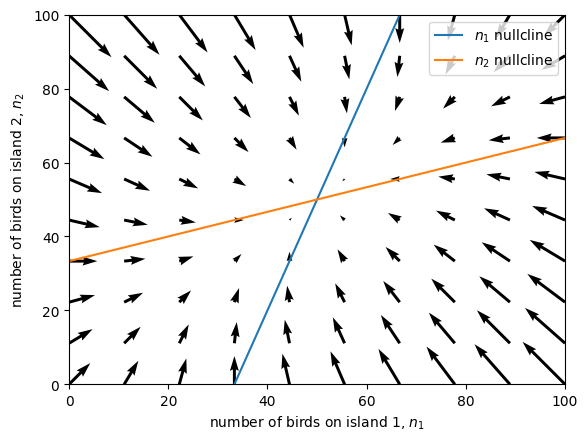

In [3]:
fig, ax = plt.subplots()

# plot nullclines
n1s = np.linspace(0,100,100)
ax.plot(n1s, [nullcline_1.subs(n1,i) for i in n1s], label='$n_1$ nullcline')
ax.plot(n1s, [nullcline_2.subs(n1,i) for i in n1s], label='$n_2$ nullcline')

# plot vector field
plot_vector_field(ax, dn1dt, dn2dt, xlims=[0,100], ylims=[0,100])

plt.xlabel('number of birds on island 1, $n_1$')
plt.ylabel('number of birds on island 2, $n_2$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend()
plt.show()

## Problem

Competition between two species can be modelled with the two-species Lotka-Volterra model, which is an extension of logistic growth to two species,

$$
\frac{\mathrm{d}n_1}{\mathrm{d}t} = n_1 r_1 \left(1 - \frac{n_1 + \alpha_{12}n_2}{K_1}\right)
$$

$$
\frac{\mathrm{d}n_2}{\mathrm{d}t} = n_2 r_2 \left(1 - \frac{n_2 + \alpha_{21}n_1}{K_2}\right).
$$

Here $n_i$ is the number of individuals of species $i$, $r_i$ is the intrinsic growth rate of species $i$, $K_i$ is the carrying capacity of species $i$, and $\alpha_{ij}$ is the competitive effect an individual of species $j$ has on an individual of species $i$.

Solve for the nullclines. 

Below is a phase plane with the nullclines plotted. Where are the equilibria? Determine the direction of movement in each section by starting in the top right, where $n_1$ and $n_2$ are much larger than $K_1$ and $K_2$. Which equilibrium appears to be stable?

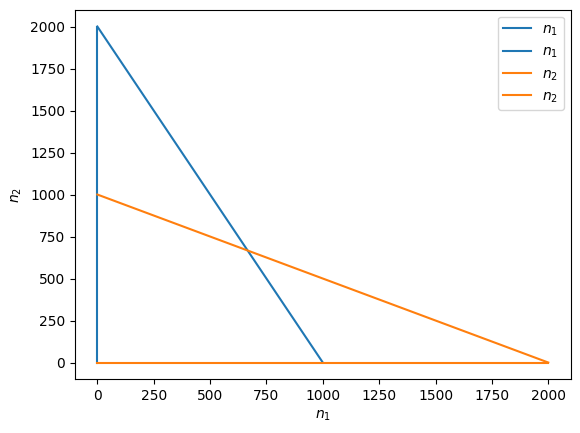

In [32]:
# variables
n1, n2 = symbols('n1, n2')

# parameter values
r1, r2 = 0.5, 0.5
k1, k2 = 1000, 1000
a12, a21 = 0.5, 0.5

# differential equations
dn1 = r1 * n1 * (1 - (n1 + a12 * n2) / k1)
dn2 = r2 * n2 * (1 - (n2 + a21 * n1) / k2)

# find nullclines
nullcline_1 = solve(Eq(dn1, 0),n1)
nullcline_2 = solve(Eq(dn2, 0),n2)

fig, ax = plt.subplots()

nmax = 2000
xrange, yrange = np.linspace(0, nmax, 100), np.linspace(0, nmax, 100)
for cline in nullcline_1:
    ax.plot([cline.subs(n2,i) for i in yrange], yrange, color=plt.cm.tab10(0), label='$n_1$')
for cline in nullcline_2:
    ax.plot(xrange, [cline.subs(n1,i) for i in xrange], color=plt.cm.tab10(1), label='$n_2$')

plt.xlabel('$n_1$')
plt.ylabel('$n_2$')
plt.legend()
plt.show()